In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
gpd = pd.read_csv("/content/drive/MyDrive/ML Lab 4-1/GradePredictionData.csv", encoding='utf8', engine='python')
gpd.head()

,Daily Study Hour,Average CT Marks,Class Attendance,PL/SPL Study Hours,PL/SPL Sleeping Hours,Average Sleeping Hours,Social Media Hours,PL/SPL Social Media Hours,Concentration in Classes,Confidence,Final Grade
0,1,8,65,12,6,8.0,3,1,NaN,3,3.25
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14


In [4]:
# Data Cleaning
#gpd["Concentration in Classes"] = gpd["Concentration in Classes"].fillna(0)
#gpd = gpd.fillna({"Daily Study Hour": 0, "Average CT Marks":0, "Class Attendance":0, "PL/SPL Study Hours":0 ,"PL/SPL Sleeping Hours":0, "Average Sleeping Hours":0, "Social Media Hours":0, "PL/SPL Social Media Hours":0, "Concentration in Classes":0, "Confidence":0})

In [5]:
newgpd = gpd[gpd['Concentration in Classes'].notna()] # getting only the row where concentration in classes is not NaN
print(newgpd.head())

feature_cols = ["Daily Study Hour", "Average CT Marks", "Class Attendance", "PL/SPL Study Hours" ,"PL/SPL Sleeping Hours", "Average Sleeping Hours", "Social Media Hours", "PL/SPL Social Media Hours", "Concentration in Classes", "Confidence"]
X = newgpd[feature_cols]
y = newgpd["Final Grade"]

   Daily Study Hour  Average CT Marks  ...  Confidence  Final Grade
1                 2                12  ...           7         3.84
2                 2                15  ...           8         3.61
3                 1                 9  ...           9         3.41
4                 1                 8  ...           4         3.14
5                 2                15  ...           9         3.88

[5 rows x 11 columns]


In [6]:
X.head()

,Daily Study Hour,Average CT Marks,Class Attendance,PL/SPL Study Hours,PL/SPL Sleeping Hours,Average Sleeping Hours,Social Media Hours,PL/SPL Social Media Hours,Concentration in Classes,Confidence
1,2,12,95,9,10,10.0,2,1,7.0,7
2,2,15,96,13,6,8.0,5,2,5.0,8
3,1,9,70,6,8,8.0,3,2,7.0,9
4,1,8,60,10,9,8.0,2,2,3.0,4
5,2,15,80,10,5,7.0,1,0,7.0,9


In [7]:
y.head()

1    3.84
2    3.61
3    3.41
4    3.14
5    3.88
Name: Final Grade, dtype: float64

**Categorize Final Result**


```
(2.00 - 2.80) => Very low 
(2.81 - 3.00) => Low 
(3.01 - 3.20) => Moderate 
(3.21 - 3.50) => Good
(3.51 - 3.75) => Very Good 
(3.76 - 4.00) => Topper
```



In [8]:
newgpd["Output"] = pd.cut(y, bins=[0, 2.75, 3.00, 3.20, 3.50, 3.75, 4.00], labels=["Very Low", "Low", "Moderate", "Good", "Very Good", "Topper"])
#gpd["Output"] = pd.cut(y, bins=[0, 2.80, 3.00, 3.20, 3.50, 4.00], labels=[0, 1, 2, 3, 4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
newgpd.head()

,Daily Study Hour,Average CT Marks,Class Attendance,PL/SPL Study Hours,PL/SPL Sleeping Hours,Average Sleeping Hours,Social Media Hours,PL/SPL Social Media Hours,Concentration in Classes,Confidence,Final Grade,Output
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84,Topper
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61,Very Good
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41,Good
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14,Moderate
5,2,15,80,10,5,7.0,1,0,7.0,9,3.88,Topper


**Categorize Final Result**

In [10]:
y = newgpd.Output

In [11]:
print(y.shape)

(87,)


In [12]:
newgpd.head()

,Daily Study Hour,Average CT Marks,Class Attendance,PL/SPL Study Hours,PL/SPL Sleeping Hours,Average Sleeping Hours,Social Media Hours,PL/SPL Social Media Hours,Concentration in Classes,Confidence,Final Grade,Output
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84,Topper
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61,Very Good
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41,Good
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14,Moderate
5,2,15,80,10,5,7.0,1,0,7.0,9,3.88,Topper


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
print(X_train.shape, y_train.shape)

(69, 10) (69,)


In [14]:
DT = DecisionTreeClassifier(criterion="gini")
DT = DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

print("Accurary: ", accuracy_score(y_test, y_pred))

Accurary:  0.5


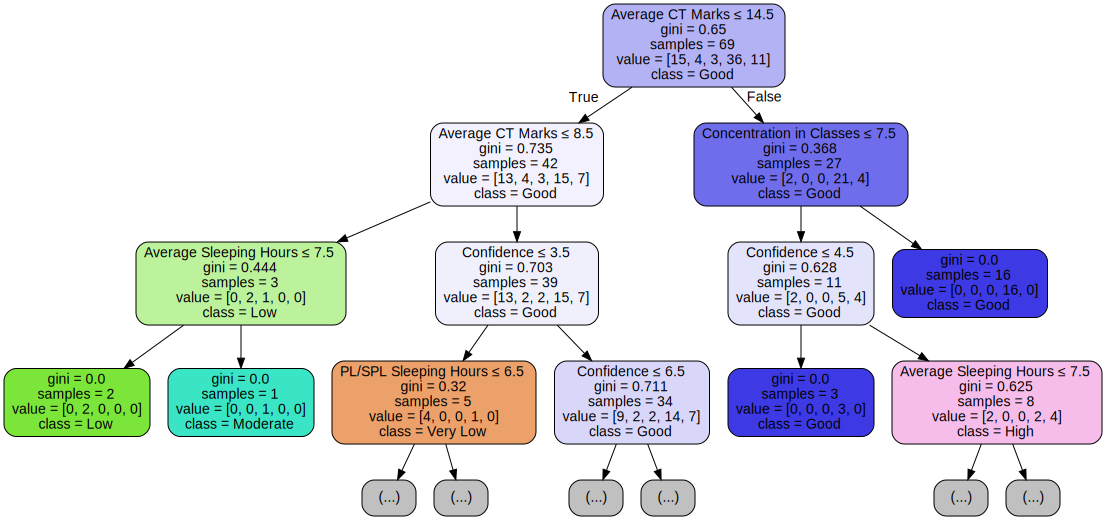

In [15]:
import graphviz
dot_data = tree.export_graphviz(DT, max_depth=3, feature_names = feature_cols, class_names = ["Very Low", "Low", "Moderate", "Good", "High"],
                                filled=True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

# **KNN**


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train[0:4, :]

array([[ 0.07315985,  0.36033599,  0.81504474, -0.02236068, -0.72308186,
        -0.73161971, -0.28258118, -0.6860973 ,  0.89930861,  0.76533257],
       [-1.60951675,  0.36033599, -0.14355902, -0.40808241,  1.85757236,
         0.24860864,  1.34226063,  1.00464248, -0.02684503,  1.23265954],
       [ 0.07315985,  0.77472238,  0.17597557, -0.40808241,  0.99735429,
        -0.73161971,  0.80064669,  1.00464248, -0.02684503, -0.16932137],
       [ 0.91449815,  0.77472238,  0.81504474,  0.36336105, -0.72308186,
         2.20906535, -0.82419512, -1.5314672 ,  0.89930861,  0.76533257]])

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [19]:
for i in range(1, 14, 2):
  KNN = KNeighborsClassifier(n_neighbors=5)
  KNN.fit(X_train, y_train)
  y_pred = KNN.predict(X_test)
  print("KNN Accurary ",i," : ", accuracy_score(y_test, y_pred))
print("KNN Confusion Metrix  : \n",confusion_matrix(y_test, y_pred))


KNN Accurary  1  :  0.6111111111111112
KNN Accurary  3  :  0.6111111111111112
KNN Accurary  5  :  0.6111111111111112
KNN Accurary  7  :  0.6111111111111112
KNN Accurary  9  :  0.6111111111111112
KNN Accurary  11  :  0.6111111111111112
KNN Accurary  13  :  0.6111111111111112
KNN Confusion Metrix  : 
 [[2 0 2 0 0]
 [1 0 1 0 0]
 [1 0 9 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]


# **Parameter Tuning Decision Tree**

In [20]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
parameter_dict = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1,13),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,7)
}

In [21]:
gs = GridSearchCV(dt, param_grid=parameter_dict, cv=5)
gs.fit(X_train, y_train)

gs_pred = gs.predict(X_test)
acurracy = accuracy_score(y_test, gs_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  Fi

In [22]:
print(gs.best_params_)
print("accuracy score: ", acurracy)

{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy score:  0.6666666666666666


In [23]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_leaf=1, min_samples_split=2)
DT = DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("Accuracy : ", accuracy_score(y_pred, y_test))


Accuracy :  0.6666666666666666


# **KNN Parameter Tuning**

In [30]:
grid_params = { 'n_neighbors' : range(1, 14)}

In [31]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3)
# fit the model on our train set
g_res = gs.fit(X_train, y_train)
# get the hyperparameters with the best score
gs.best_params_

{'n_neighbors': 6}

In [32]:
gs_pred = gs.predict(X_test)
acc = accuracy_score(y_test,gs_pred)
print("Accuracy: ", acc)

Accuracy:  0.6666666666666666
